## Extended Kalman Filter Localization

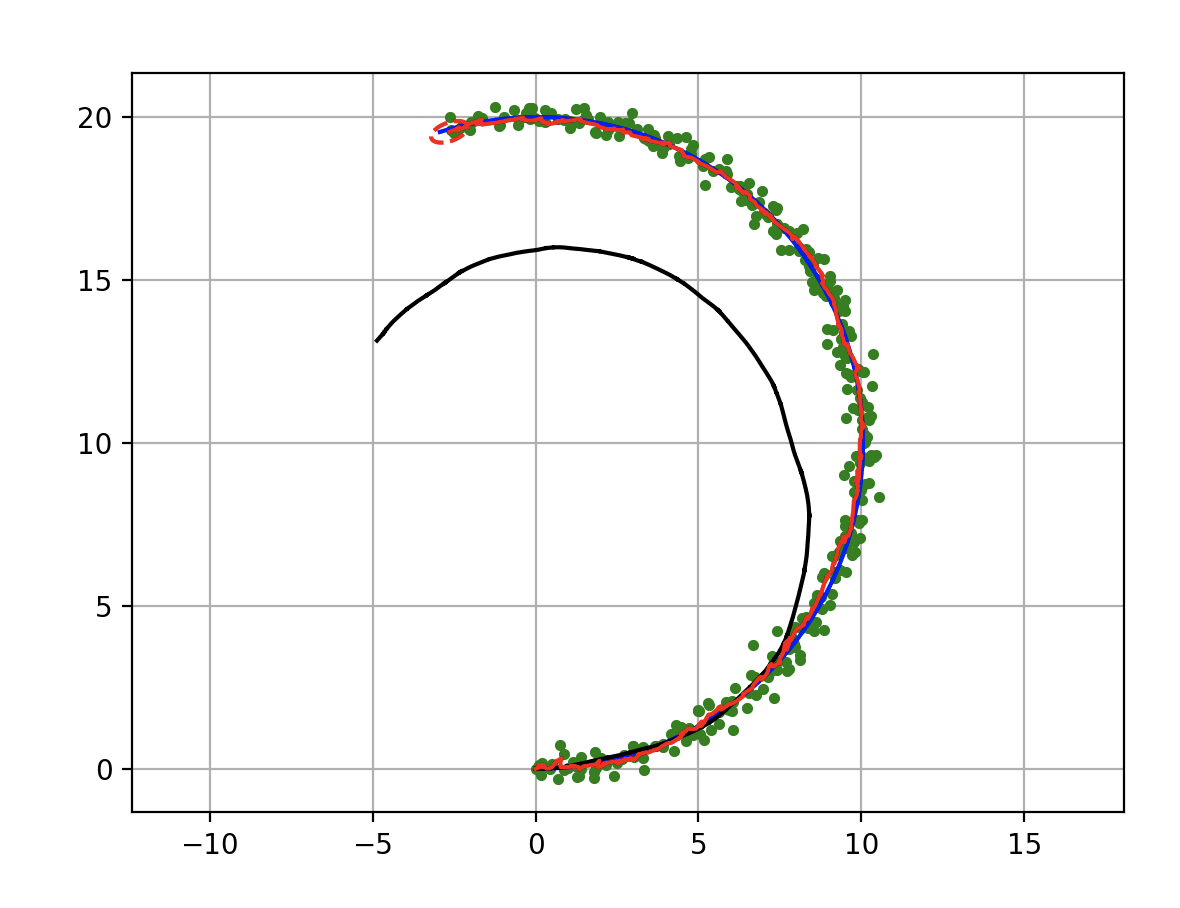

In [2]:
from IPython.display import Image
Image(filename="ekf.png",width=600)

![EKF](https://github.com/AtsushiSakai/PythonRoboticsGifs/raw/master/Localization/extended_kalman_filter/animation.gif)

This is a sensor fusion localization with Extended Kalman Filter(EKF).

The blue line is true trajectory, the black line is dead reckoning
trajectory,

the green point is positioning observation (ex. GPS), and the red line
is estimated trajectory with EKF.

The red ellipse is estimated covariance ellipse with EKF.

Code: [PythonRobotics/extended\_kalman\_filter\.py at master · AtsushiSakai/PythonRobotics](https://github.com/AtsushiSakai/PythonRobotics/blob/master/Localization/extended_kalman_filter/extended_kalman_filter.py)

### Filter design

In this simulation, the robot has a state vector includes 4 states at time $t$.

$$\textbf{x}_t=[x_t, y_t, \phi_t, v_t]$$

x, y are a 2D x-y position, $\phi$ is orientation, and v is velocity.

In the code, "xEst" means the state vector. [code](https://github.com/AtsushiSakai/PythonRobotics/blob/916b4382de090de29f54538b356cef1c811aacce/Localization/extended_kalman_filter/extended_kalman_filter.py#L168)

And, $P_t$ is covariace matrix of the state,

$Q$ is covariance matrix of process noise, 

$R$ is covariance matrix of observation noise at time $t$ 

　

The robot has a speed sensor and a gyro sensor.

So, the input vecor can be used as each time step

$$\textbf{u}_t=[v_t, \omega_t]$$

Also, the robot has a GNSS sensor, it means that the robot can observe x-y position at each time.

$$\textbf{z}_t=[x_t,y_t]$$

The input and observation vector includes sensor noise.

In the code, "observation" function generates the input and observation vector with noise [code](https://github.com/AtsushiSakai/PythonRobotics/blob/916b4382de090de29f54538b356cef1c811aacce/Localization/extended_kalman_filter/extended_kalman_filter.py#L34-L50)



### Motion Model

The robot model is 

$$ \dot{x} = vcos(\phi)$$

$$ \dot{y} = vsin((\phi)$$

$$ \dot{\phi} = \omega$$


So, the motion model is

$$\textbf{x}_{t+1} = F\textbf{x}_t+B\textbf{u}_t$$

where

$\begin{equation*}
F=
\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 \\
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
B=
\begin{bmatrix}
cos(\phi)dt & 0\\
sin(\phi)dt & 0\\
0 & dt\\
1 & 0\\
\end{bmatrix}
\end{equation*}$

$dt$ is a time interval.

This is implemented at [code](https://github.com/AtsushiSakai/PythonRobotics/blob/916b4382de090de29f54538b356cef1c811aacce/Localization/extended_kalman_filter/extended_kalman_filter.py#L53-L67)

Its Jacobian matrix is

$\begin{equation*}
J_F=
\begin{bmatrix}
\frac{dx}{dx}& \frac{dx}{dy} & \frac{dx}{d\phi} &  \frac{dx}{dv}\\
\frac{dy}{dx}& \frac{dy}{dy} & \frac{dy}{d\phi} &  \frac{dy}{dv}\\
\frac{d\phi}{dx}& \frac{d\phi}{dy} & \frac{d\phi}{d\phi} &  \frac{d\phi}{dv}\\
\frac{dv}{dx}& \frac{dv}{dy} & \frac{dv}{d\phi} &  \frac{dv}{dv}\\
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
　=
\begin{bmatrix}
1& 0 & -v sin(\phi)dt &  cos(\phi)dt\\
0 & 1 & v cos(\phi)dt & sin(\phi) dt\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1\\
\end{bmatrix}
\end{equation*}$

### Observation Model

The robot can get x-y position infomation from GPS.

So GPS Observation model is

$$\textbf{z}_{t} = H\textbf{x}_t$$

where

$\begin{equation*}
B=
\begin{bmatrix}
1 & 0 & 0& 0\\
0 & 1 & 0& 0\\
\end{bmatrix}
\end{equation*}$

Its Jacobian matrix is

$\begin{equation*}
J_H=
\begin{bmatrix}
\frac{dx}{dx}& \frac{dx}{dy} & \frac{dx}{d\phi} &  \frac{dx}{dv}\\
\frac{dy}{dx}& \frac{dy}{dy} & \frac{dy}{d\phi} &  \frac{dy}{dv}\\
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
　=
\begin{bmatrix}
1& 0 & 0 & 0\\
0 & 1 & 0 & 0\\
\end{bmatrix}
\end{equation*}$



### Extented Kalman Filter

Localization process using Extendted Kalman Filter:EKF is

=== Predict ===

$x_{Pred} = Fx_t+Bu_t$

$P_{Pred} = J_FP_t J_F^T + Q$

=== Update ===

$z_{Pred} = Hx_{Pred}$ 

$y = z - z_{Pred}$

$S = J_H P_{Pred}.J_H^T + R$

$K = P_{Pred}.J_H^T S^{-1}$

$x_{t+1} = x_{Pred} + Ky$

$P_{t+1} = ( I - K J_H) P_{Pred}$



### Ref:

- [PROBABILISTIC\-ROBOTICS\.ORG](http://www.probabilistic-robotics.org/)